# Explore demographics in loanword authors
We have extracted the self-reported demographic variables for all loanword authors. Let's see the coverage and distribution.

### Post counts
How many posts on average did loanword authors tend to write?

In [29]:
import pandas as pd
import re
from data_helpers import load_data_from_dirs
data_dirs = ['../../data/mined_tweets/loanword_author_tweets_all_archives/']
file_matcher = re.compile('.*tweets\.gz')
data = load_data_from_dirs(data_dirs, file_matcher=file_matcher)
print(data.shape[0])

14519383


In [36]:
np.log(100) / np.log(10)

2.0

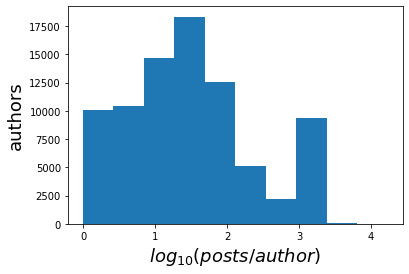

In [38]:
# how many posts per author?
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
author_var = 'screen_name'
plt.hist(np.log(data.loc[:, author_var].value_counts()) / np.log(10)) # log base 10
plt.xlabel('$log_{10}(posts/author)$', fontsize=18)
plt.ylabel('authors', fontsize=18)
plt.show()

### Age

In [63]:
age_meta_data = pd.read_csv('../../data/mined_tweets/loanword_author_descriptive_data_ages.tsv', sep='\t', index_col=False)
age_meta_data.fillna('', inplace=True)
age_meta_data = age_meta_data.assign(**{
    'user_screen_name' : age_meta_data.loc[:, 'user_screen_name'].apply(lambda x: x.lower())
})
display(age_meta_data.head(20))

,user_screen_name,age
0,kellyelizond,19
1,hda1983,90
2,trufatartufa,20
3,jessstrokes_,20
4,conchetulipa,16
5,paky241428,31
6,nycollesmile,22
7,bngtnftdku,17
8,rodrigo_cayo,27
9,otpdonghan,98


### Location

In [49]:
location_meta_data = pd.read_csv('../../data/control_var_data/loanword_author_descriptive_data_locations.tsv', sep='\t', index_col=False)
location_meta_data.fillna('', inplace=True)
location_meta_data.rename(columns={'user_description':'user_location'}, inplace=True)
display(location_meta_data.head(20))

,user_location,description_location_country
0,puerto rico/ fl,
1,"islas canarias, espana",ES
2,s k y d o p e,
3,"guadalupe, nuevo leon",
4,venezuela,VE
5,qin fen & yugy ([?]_[?];),
6,tigre,AR
7,panama,PA
8,"monte landin, villasobroso",
9,"jose carlos paz, argentina",AR


In [50]:
# how many descriptions have valid locations?
valid_location_meta_data = location_meta_data[location_meta_data.loc[:, 'description_location_country']!='']
valid_location_pct = valid_location_meta_data.shape[0] / location_meta_data.shape[0] * 100
print('%.3f of locations (%d/%d) are valid'%(valid_location_pct, valid_location_meta_data.shape[0], location_meta_data.shape[0]))

16.278 of locations (5905/36276) are valid


OK! This is not great. 

What is the distribution of valid countries?

In [6]:
display(valid_location_meta_data.loc[:, 'description_location_country'].value_counts().head(10))

ES    1353
AR    1023
US     708
MX     549
CL     327
CO     308
VE     283
PE     152
EC     142
UY     121
Name: description_location_country, dtype: int64

Most of these locations make sense: either Spain, Latin America or US.

### Assess author demographic coverage
How many authors have (1) valid age (2) valid location (3) all demographics?

In [99]:
from data_helpers import clean_txt_simple
integrated_loanword_author_data = pd.read_csv('../../data/mined_tweets/loanword_integrated_verb_author_counts_CLUSTER=twitter_posts.tsv', sep='\t', index_col=False)
light_verb_loanword_author_data = pd.read_csv('../../data/mined_tweets/loanword_light_verb_author_counts_CLUSTER=twitter_posts.tsv', sep='\t', index_col=False)
integrated_loanword_author_data = integrated_loanword_author_data.assign(**{
    'loanword_author_type' : 'integrated'
})
light_verb_loanword_author_data = light_verb_loanword_author_data.assign(**{
    'loanword_author_type' : 'light_verb'
})
# combine
loanword_author_data = pd.concat([integrated_loanword_author_data, light_verb_loanword_author_data], axis=0)
loanword_author_data.fillna('', inplace=True)
loanword_author_data.drop_duplicates('user_screen_name', inplace=True)
# display(loanword_author_data.head())
# get unique authors, description data
loanword_author_description_data = loanword_author_data.loc[:, ['user_screen_name', 'user_description', 'user_location', 'loanword_author_type']]
loanword_author_description_data = loanword_author_description_data.assign(**{
    'user_screen_name' : loanword_author_description_data.loc[:, 'user_screen_name'].apply(lambda x: x.lower()),
    'user_location' : loanword_author_description_data.loc[:, 'user_location'].apply(lambda x: clean_txt_simple(x))
})
display(loanword_author_description_data.head())

,user_screen_name,user_description,user_location,loanword_author_type
0,flavius85349047,,,integrated
1,leocastillokk,Ser dé Racing,"moron, argentina",integrated
2,freroplopsgames,Tiesto,,integrated
3,lizyllen,"Mamá de 3, profesora universitaria, asesora co...",venezuela,integrated
4,viridiane_welle,,,integrated


In [100]:
# join data
loanword_author_demographic_data = pd.merge(loanword_author_description_data, age_meta_data, on='user_screen_name', how='left')
loanword_author_demographic_data = pd.merge(loanword_author_demographic_data.loc[:, ['user_screen_name', 'user_description', 'age', 'loanword_author_type']], loanword_author_description_data.loc[:, ['user_screen_name', 'user_location']], on='user_screen_name', how='left')
loanword_author_demographic_data = pd.merge(loanword_author_demographic_data, valid_location_meta_data, on='user_location', how='left')
loanword_author_demographic_data.drop_duplicates('user_screen_name', inplace=True)
loanword_author_demographic_data.fillna('', inplace=True)
display(loanword_author_demographic_data.head())

,user_screen_name,user_description,age,loanword_author_type,user_location,description_location_country
0,flavius85349047,,,integrated,,
1,leocastillokk,Ser dé Racing,,integrated,"moron, argentina",AR
2,freroplopsgames,Tiesto,,integrated,,
3,lizyllen,"Mamá de 3, profesora universitaria, asesora co...",,integrated,venezuela,VE
14,viridiane_welle,,,integrated,,


In [101]:
loanword_author_demographic_data_with_loc = loanword_author_demographic_data[loanword_author_demographic_data.loc[:, 'description_location_country'] != '']
loanword_author_demographic_data_with_age = loanword_author_demographic_data[loanword_author_demographic_data.loc[:, 'age'] != '']
loanword_author_demographic_data_with_loc_age = loanword_author_demographic_data[(loanword_author_demographic_data.loc[:, 'description_location_country'] != '') & 
                                                                                 (loanword_author_demographic_data.loc[:, 'age'] != '')]
N = loanword_author_demographic_data.shape[0]
N_loc = loanword_author_demographic_data_with_loc.shape[0]
N_age = loanword_author_demographic_data_with_age.shape[0]
N_loc_age = loanword_author_demographic_data_with_loc_age.shape[0]
print('%d authors total'%(N))
print('%d/%d authors with location (%.3f%%)'%(N_loc, N, N_loc / N * 100))
print('%d/%d authors with age (%.3f%%)'%(N_age, N, N_age / N * 100))
print('%d/%d authors with loc + age (%.3f%%)'%(N_loc_age, N, N_loc_age / N * 100))

132731 authors total
44628/132731 authors with location (33.623%)
4576/132731 authors with age (3.448%)
1893/132731 authors with loc + age (1.426%)


OK! The coverage actually isn't terrible: 34% of authors have a valid location and 3% have a valid age. We can also get age with musician age distributions.

What are the per-author distributions?

In [69]:
print(loanword_author_demographic_data_with_loc.loc[:, 'description_location_country'].value_counts().head(10))

AR    13008
ES     7565
MX     4714
CO     3293
VE     2983
CL     2429
US     2312
EC     1433
PE     1276
UY     1116
Name: description_location_country, dtype: int64


#### Plot author locations

Let's plot this distribution for integrated loanword authors and light verb loanword authors.

In [171]:
# map each country name to lat/lon center
import pandas as pd
geonames_data = pd.read_csv('/hg190/corpora/GeoNames/allCountriesSimplified.tsv', sep='\t', index_col=False, usecols=['name', 'feature_code', 'latitude', 'longitude', 'country'])
country_code = 'PCLI'
country_geonames_data = geonames_data[geonames_data.loc[:, 'feature_code'] == country_code].loc[:, ['latitude', 'longitude', 'country']]
display(country_geonames_data.head())

,latitude,longitude,country
2746,42.55,1.58333,AD
3420,23.75,54.50000,AE
38023,33.00,66.00000,AF
85465,17.05,-61.80000,AG
88716,41.00,20.00000,AL


In [224]:
# get country counts for all authors, then map to lat/lon
author_var = 'screen_name'
country_var = 'description_location_country'
integrated_verb_author_country_counts = loanword_author_demographic_data_with_loc[loanword_author_demographic_data_with_loc.loc[:, 'loanword_author_type']=='integrated'].loc[:, country_var].value_counts().reset_index().rename(columns={'index' : 'country', country_var : 'count'})
light_verb_author_country_counts = loanword_author_demographic_data_with_loc[loanword_author_demographic_data_with_loc.loc[:, 'loanword_author_type']=='light_verb'].loc[:, country_var].value_counts().reset_index().rename(columns={'index' : 'country', country_var : 'count'})
# normalize counts
integrated_verb_author_country_counts = integrated_verb_author_country_counts.assign(**{
    'count_pct' : integrated_verb_author_country_counts.loc[:, 'count'] / integrated_verb_author_country_counts.loc[:, 'count'].sum()
})
light_verb_author_country_counts = light_verb_author_country_counts.assign(**{
    'count_pct' : light_verb_author_country_counts.loc[:, 'count'] / light_verb_author_country_counts.loc[:, 'count'].sum()
})
# combine with country lat/lon
integrated_verb_author_country_counts = pd.merge(integrated_verb_author_country_counts, country_geonames_data, on='country')
light_verb_author_country_counts = pd.merge(light_verb_author_country_counts, country_geonames_data, on='country')
display(integrated_verb_author_country_counts.head())
display(light_verb_author_country_counts.head())

,country,count,count_pct,latitude,longitude
0,AR,12070,0.294441,-34.0,-64.00
1,ES,7107,0.173371,40.0,-4.00
2,MX,4139,0.100968,23.0,-102.00
3,CO,2954,0.072061,4.0,-73.25
4,VE,2809,0.068524,8.0,-66.00


,country,count,count_pct,latitude,longitude
0,AR,938,0.258047,-34.00,-64.00
1,MX,575,0.158184,23.00,-102.00
2,ES,458,0.125997,40.00,-4.00
3,CO,339,0.093260,4.00,-73.25
4,US,228,0.062724,39.76,-98.50


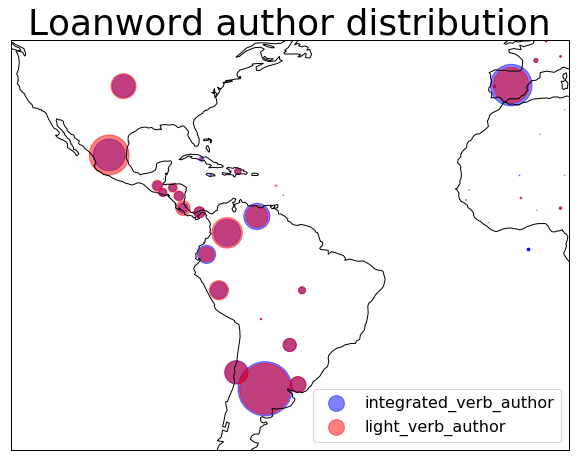

In [229]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
import cartopy.crs

fig = plt.figure(figsize=(10, 10))
map_borders = [[-49, 51], [-126, 10]]
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.scatter(0, 0, color='b', s=7)
ax.coastlines(resolution='110m')
ax.set_xlim(map_borders[1])
ax.set_ylim(map_borders[0])
# plot integrated verb author data
size_scale_factor = 10000
ax.scatter(integrated_verb_author_country_counts.loc[:, 'longitude'], 
           integrated_verb_author_country_counts.loc[:, 'latitude'], 
           s=integrated_verb_author_country_counts.loc[:, 'count_pct']*size_scale_factor, 
           alpha=0.5, color='b', label='integrated_verb_author')
# plot light verb author data
scatter_plot = ax.scatter(light_verb_author_country_counts.loc[:, 'longitude'], 
                          light_verb_author_country_counts.loc[:, 'latitude'], 
                          s=light_verb_author_country_counts.loc[:, 'count_pct']*size_scale_factor, 
                          alpha=0.5, color='r', label='light_verb_author')
# same marker size!!
def update_prop(handle, orig):
    marker_size = 250
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(loc='lower right', 
           handler_map={type(scatter_plot): HandlerPathCollection(update_func=update_prop)},
           fontsize=16)
plt.title('Loanword author distribution', fontsize=36)
plt.show()

### Language use
Language use isn't really a demographic but we still need to assess the distribution of e.g. monolingual vs. bilingual.

We have calculated the distribution of languages [here](extract_lang_use_for_authors.py).

In [80]:
from scipy.sparse import load_npz
# load language count matrix
author_lang_count_file = '../../data/mined_tweets/author_lang_counts.npz'
author_lang_counts = load_npz(author_lang_count_file)
author_idx = list(map(lambda x: x.strip(), open(f'{author_lang_count_file}.rows', 'r')))
lang_idx = list(map(lambda x: x.strip(), open(f'{author_lang_count_file}.cols', 'r')))
author_idx_lookup = dict(zip(author_idx, range(len(author_idx))))
lang_idx_lookup = dict(zip(lang_idx, range(len(lang_idx))))

In [94]:
print(np.array(author_lang_counts[:, lang_idx_lookup[lang]] / author_lang_counts.sum(axis=1))[:, 0])

[0.95177866 0.8582996  0.95701357 ... 0.86541471 0.87317073 0.87128713]


In [95]:
import pandas as pd
# get ES % use
lang = 'es'
author_es_pct = pd.Series(np.array(author_lang_counts[:, lang_idx_lookup[lang]] / author_lang_counts.sum(axis=1))[:, 0], index=author_idx)
print(author_es_pct.head())

000822e5bc974e0    0.951779
0063_tmi           0.858300
007martin          0.957014
00tropico_         0.900000
01Magena           0.946925
dtype: float64


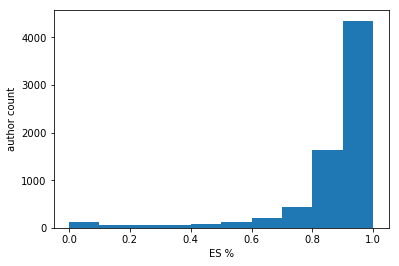

In [97]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# what's the distribution of languages?
plt.hist(author_es_pct)
plt.xlabel('ES %')
plt.ylabel('author count')
plt.show()

As expected, mostly monolingual ES people.

Separate by loanword type.

In [209]:
author_var = 'user_screen_name'
author_type_var = 'loanword_author_type'
author_es_pct_data = author_es_pct.reset_index().rename(columns={'index' : author_var, 0:'ES_pct'})
author_es_pct_data = pd.merge(author_es_pct_data, loanword_author_demographic_data.loc[:, [author_var, author_type_var]], on=author_var)
display(author_es_pct_data.head())

,user_screen_name,ES_pct,loanword_author_type
0,000822e5bc974e0,0.951779,integrated
1,0063_tmi,0.858300,integrated
2,007martin,0.957014,integrated
3,00tropico_,0.900000,integrated
4,028_mariana,0.821429,integrated


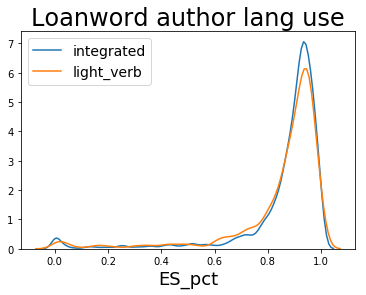

In [231]:
import seaborn as sns
import numpy as np
lang_pct_var = 'ES_pct'
bin_count = 10
bin_range = np.linspace(0., 1., bin_count+1)
bin_range_pairs = list(zip(bin_range[:-1], bin_range[1:]))
X = bin_range[:-1]
X_ticks = list(map(lambda x: '[%.1f,%.1f]'%(x[0], x[1]), bin_range_pairs))
bar_width = 0.05
for i, (type_i, data_i) in enumerate(author_es_pct_data.groupby(author_type_var)):
    # get KDE plot
    sns.kdeplot(data_i.loc[:, lang_pct_var], label=type_i)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel(lang_pct_var, fontsize=18)
plt.title('Loanword author lang use', fontsize=24)
plt.show()

Is this difference significant?

In [235]:
import numpy as np
from scipy.stats import mannwhitneyu, kruskal
integrated_verb_es_pct = author_es_pct_data[author_es_pct_data.loc[:, author_type_var]=='integrated'].loc[:, lang_pct_var].values
light_verb_es_pct = author_es_pct_data[author_es_pct_data.loc[:, author_type_var]=='light_verb'].loc[:, lang_pct_var].values
diff = np.median(integrated_verb_es_pct) - np.median(light_verb_es_pct)
test_stat, p_val = mannwhitneyu(integrated_verb_es_pct, light_verb_es_pct)
print('difference in lang use %.3f with test stat=%.3f (p=%.3E)'%(diff, test_stat, p_val))

difference in lang use 0.004 with test stat=799932.500 (p=2.257E-02)


### Test social variable overlap coverage
How much overlap is there in the different social variables?

- location
- language use
- media sharing
- native verb use

In [39]:
import pandas as pd
# load original data for comparison
loanword_author_data = pd.read_csv('../../data/mined_tweets/loanword_verb_posts_CLUSTER=twitter_posts_STARTDATE=2017_7_9_ENDDATE=2019_4_6.tsv', sep='\t')
loanword_author_data.rename(columns={'user_screen_name' : 'screen_name'}, inplace=True)
# cleanup authors
author_var = 'screen_name'
loanword_author_data = loanword_author_data.assign(**{
    author_var : loanword_author_data.loc[:, author_var].apply(lambda x: x.lower())
})
N_loanword_author = loanword_author_data.loc[:, author_var].nunique()
N_loanword_posts = loanword_author_data.shape[0]
display(loanword_author_data.head())

,loanword,loanword_verb,loanword_type,screen_name,user_id,text,date,id,user_description,user_location
0,audit,auditamos,integrated_loanword,garrachavista,779318307585396736,@Sheiladarsy @anticuarta4 Y dime tu cuales 7.6...,NaN,892506833197424640,100% a la izquierda,Venezuela
1,ban,baneamos,integrated_loanword,emmanuelkiller5,4273648032,@adameamiro Eres tan hipocrita que antes nos h...,NaN,882375684823203841,"Felicidad?Que es eso, lo que todos siempre me ...","Chihuahua, Chihuahua"
2,ban,baneamos,integrated_loanword,danitolocirio13,482233447,@LVPibai Ibai te hace una normal de reclu? Así...,NaN,893999585953185793,#21. Me gusta Love Live. Reborn. Baraggan y Es...,"Valladolid, España"
3,ban,banear,integrated_loanword,vcf973,883037197754093569,@MiiKeLMsT MIKEEL! CASI ME BANEAN POR COMPRAR ...,NaN,899277329012334593,.,Tenerife
4,ban,banean,integrated_loanword,redbuhd,1242442598,Iba 1/4 minuto 50 y me banean por xray xddd lo...,NaN,888510097688739840,ImRedbuh - 13 Wins UHC - Peruvian#PalomasArmy ...,Debajo de tu cama


In [45]:
# location data
author_location_data = pd.read_csv('../../data/mined_tweets/loanword_author_descriptive_data_location_data.tsv', sep='\t')
author_location_data.rename(columns={'user_screen_name' : 'screen_name'}, inplace=True)
loc_vars = ['screen_name', 'description_location_country']
author_location_data = author_location_data.loc[:, loc_vars]
# lang data
author_lang_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives/loanword_author_tweets_all_archives_LANG=es_pct.tsv', sep='\t')
# media data
author_youtube_media_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives_youtube_video_category_per_author_pct.tsv', sep='\t')
author_spotify_media_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives_author_spotify_counts.tsv', sep='\t')
author_spotify_media_data = author_spotify_media_data.assign(**{
    'latin_american_music_genre_pct' : author_spotify_media_data.loc[:, 'latin_american_genre_count'] / author_spotify_media_data.loc[:, 'total_link_count']
})
spotify_media_vars = ['screen_name', 'latin_american_music_genre_pct']
author_spotify_media_data = author_spotify_media_data.loc[:, spotify_media_vars]
# native verb use
author_native_verb_data = pd.read_csv('../../data/mined_tweets/loanword_author_tweets_all_archives/native_integrated_light_verbs_per_author.tsv', sep='\t')
# aggregate
author_var = 'screen_name'
author_native_verb_agg_data = author_native_verb_data.groupby(author_var).apply(lambda x: x.loc[:, 'integrated_verb_pct'].mean()).reset_index().rename(columns={0 : 'integrated_verb_pct'})
all_author_data = [author_location_data, author_lang_data, author_youtube_media_data, author_spotify_media_data, author_native_verb_agg_data]
clean_author_data = []
data_vars = ['description_location_country', 'es', 'latin_american_artist_video_pct', 'latin_american_music_genre_pct', 'integrated_verb_pct']
for data, data_var in zip(all_author_data, data_vars):
    data.fillna('', inplace=True)
    data = data[data.loc[:, data_var] != '']
    data = data[data.loc[:, author_var] != '']
    data.drop_duplicates(author_var, inplace=True)
    data = data.assign(**{
        author_var : data.loc[:, author_var].apply(lambda x: x.lower())
    })
    clean_author_data.append(data)
author_location_data, author_lang_data, author_youtube_media_data, author_spotify_media_data, author_native_verb_agg_data = clean_author_data

/hg190/istewart6/miniconda3/envs/py3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [46]:
combined_data = []
author_var = 'screen_name'
clean_data_vars = ['description_location_country', 'es', 'latin_american_artist_video_pct', 'latin_american_music_genre_pct', 'integrated_verb_pct']
for data, data_var in zip(clean_author_data, clean_data_vars):
    if(len(combined_data) == 0):
        combined_data = data.copy()
    else:
        combined_data = pd.merge(combined_data, data.loc[:, [author_var, data_var]], how='outer')
combined_data.fillna('', inplace=True)

In [47]:
print(combined_data.shape[0])
display(combined_data.head())

79908


,screen_name,description_location_country,es,latin_american_artist_video_pct,latin_american_music_genre_pct,integrated_verb_pct
0,noechenchual,ES,1,,,1
1,mariamunozzzzzz,ES,0.893475,,,1
2,soniamartin99,ES,1,,,
3,eleytricaa,ES,1,,,1
4,claulovesshawn,ES,1,,,1


In [48]:
import numpy as np
# let's combine the media vars for now
def assign_media_pct(data, media_vars):
    media_pcts = list(filter(lambda x: x!='', data.loc[media_vars].values))
    if(len(media_pcts) > 0):
        media_pct = np.mean(media_pcts)
    else:
        media_pct = ''
    return media_pct
combined_media_var = 'latin_american_media_pct'
media_vars = ['latin_american_artist_video_pct', 'latin_american_music_genre_pct']
combined_data = combined_data.assign(**{
    combined_media_var : combined_data.apply(lambda x: assign_media_pct(x, media_vars), axis=1)
})

Determine coverage among each attribute and intersection between all attributes.

In [50]:
# all media
coverage_data = []
all_social_data_vars = ['description_location_country', 'es', 'latin_american_media_pct', 'latin_american_artist_video_pct', 'latin_american_music_genre_pct', 'integrated_verb_pct']
for data_var in all_social_data_vars:
    data_i = combined_data[combined_data.loc[:, data_var] != '']
    loanword_author_data_i = loanword_author_data[loanword_author_data.loc[:, author_var].isin(data_i.loc[:, author_var].values)]
    N_author_i = loanword_author_data_i.loc[:, author_var].nunique()
    author_coverage_i = N_author_i / N_loanword_author
    N_post_i = loanword_author_data_i.shape[0]
    post_coverage_i = N_post_i / N_loanword_posts
    print('var=%s author coverage=%d/%d (%.3f)'%(data_var, N_author_i, N_loanword_author, author_coverage_i))
    print('var=%s post coverage=%d/%d (%.3f)'%(data_var, N_post_i, N_loanword_posts, post_coverage_i))
    coverage_data.append([data_var, N_post_i, post_coverage_i, N_author_i, author_coverage_i])
coverage_data = pd.DataFrame(coverage_data, columns=['data_var', 'post count', 'post %', 'author count', 'author %'])
display(coverage_data)

var=description_location_country author coverage=26827/82797 (0.324)
var=description_location_country post coverage=29520/89556 (0.330)
var=es author coverage=78626/82797 (0.950)
var=es post coverage=85238/89556 (0.952)
var=latin_american_media_pct author coverage=6471/82797 (0.078)
var=latin_american_media_pct post coverage=7023/89556 (0.078)
var=latin_american_artist_video_pct author coverage=6120/82797 (0.074)
var=latin_american_artist_video_pct post coverage=6628/89556 (0.074)
var=latin_american_music_genre_pct author coverage=1531/82797 (0.018)
var=latin_american_music_genre_pct post coverage=1734/89556 (0.019)
var=integrated_verb_pct author coverage=45520/82797 (0.550)
var=integrated_verb_pct post coverage=50653/89556 (0.566)


,data_var,post count,post %,author count,author %
0,description_location_country,29520,0.329626,26827,0.324009
1,es,85238,0.951784,78626,0.949624
2,latin_american_media_pct,7023,0.078420,6471,0.078155
3,latin_american_artist_video_pct,6628,0.074010,6120,0.073916
4,latin_american_music_genre_pct,1734,0.019362,1531,0.018491
5,integrated_verb_pct,50653,0.565601,45520,0.549778


OK! So what is the join coverage?

In [56]:
# joint coverage
joint_data = combined_data.copy()
social_data_vars = ['description_location_country', 'es', 'latin_american_media_pct', 'integrated_verb_pct']
for data_var in social_data_vars:
    joint_data = joint_data[joint_data.loc[:, data_var] != '']
N_joint_authors = joint_data.loc[:, author_var].nunique()
N_joint_posts = loanword_author_data[loanword_author_data.loc[:, author_var].isin(joint_data.loc[:, author_var].values)].shape[0]
print('%d/%d posts with all variables (%.3f%%)'%(N_joint_posts, N_loanword_posts, N_joint_posts / N_loanword_posts * 100))
print('%d/%d authors with all variables (%.3f%%)'%(N_joint_authors, N_loanword_author, N_joint_authors / N_loanword_author * 100))

2280/89556 posts with all variables (2.546%)
2106/82797 authors with all variables (2.544%)


OK! This is actually good.

What if we leave out native verbs?

In [54]:
subset_social_data_vars = ['description_location_country', 'es', 'latin_american_media_pct']
joint_data = combined_data.copy()
for data_var in subset_social_data_vars:
    joint_data = joint_data[joint_data.loc[:, data_var] != '']
# authors
N_joint_authors = joint_data.loc[:, author_var].nunique()
N_joint_posts = loanword_author_data[loanword_author_data.loc[:, author_var].isin(joint_data.loc[:, author_var].values)].shape[0]
print('joint data has %d/%d authors (%.3f)'%(N_joint_authors, N_loanword_author, N_joint_authors / N_loanword_author * 100))
print('joint data has %d/%d posts (%.3f)'%(N_joint_posts, N_loanword_posts, N_joint_posts / N_loanword_posts * 100))

joint data has 2145/82797 authors (2.591)
joint data has 2321/89556 posts (2.592)


In [57]:
subset_social_data_vars = ['description_location_country', 'es', 'integrated_verb_pct']
joint_data = combined_data.copy()
for data_var in subset_social_data_vars:
    joint_data = joint_data[joint_data.loc[:, data_var] != '']
# authors
N_joint_authors = joint_data.loc[:, author_var].nunique()
N_joint_posts = loanword_author_data[loanword_author_data.loc[:, author_var].isin(joint_data.loc[:, author_var].values)].shape[0]
print('joint data has %d/%d authors (%.3f)'%(N_joint_authors, N_loanword_author, N_joint_authors / N_loanword_author * 100))
print('joint data has %d/%d posts (%.3f)'%(N_joint_posts, N_loanword_posts, N_joint_posts / N_loanword_posts * 100))

joint data has 14943/82797 authors (18.048)
joint data has 16987/89556 posts (18.968)


Still pretty good.

### Testing Google Drive

In [7]:
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.credentials import AnonymousCredentials
# import json
# google_creds_file = '../../data/google_drive_credentials.json'
# scopes = ['https://www.googleapis.com/auth/drive.metadata.readonly']
# flow = InstalledAppFlow.from_client_secrets_file(google_creds_file, scopes=scopes)
# creds = flow.run_local_server(port=0)
# service = build('drive', 'v3', acc)
# # service = build('drive', 'v3', credentials=google_creds)
# # try reading files from directory
# results = service.files().list(pageSize=10, fields="nextPageToken, files(id, name)").execute()
# print(results)

In [17]:
# # load service
# from oauth2client import file, client, tools
# SCOPES = 'https://www.googleapis.com/auth/drive.file'
# cred_file = '../../data/google_drive_credentials.json'
# store = file.Storage(cred_file)
# creds = store.get()
# # if not creds or creds.invalid:
# #     flow = client.flow_from_clientsecrets('client_secret.json', SCOPES)
# #     creds = tools.run_flow(flow, store)
# drive_service = build('drive', 'v3', http=creds.authorize(Http()))

In [18]:
# from apiclient.http import MediaFileUpload
# # upload file
# file_name = '../../data/mined_tweets/loanword_author_tweets/aa_blea_tweets.gz'
# file_metadata = {'name': file_name}
# media = MediaFileUpload(file_name,
#                         mimetype='*/*')
# file = drive_service.files().create(body=file_metadata,
#                                     media_body=media,
#                                     fields='id').execute()
# print('File ID: %s'%file.get('id'))


In [25]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
google_auth = GoogleAuth()
# cred_file = '../../data/google_drive_credentials.json'
# google_auth.LoadCredentialsFile(cred_file)
drive = GoogleDrive(google_auth)
file1 = drive.CreateFile({'title' : 'test.txt'})
file1.Upload()

KeyboardInterrupt: 

In [26]:
dir(google_auth)

['Auth',
 'Authenticate',
 'Authorize',
 'CLIENT_CONFIGS_LIST',
 'CommandLineAuth',
 'DEFAULT_SETTINGS',
 'GetAuthUrl',
 'GetFlow',
 'Get_Http_Object',
 'LoadClientConfig',
 'LoadClientConfigFile',
 'LoadClientConfigSettings',
 'LoadCredentials',
 'LoadCredentialsFile',
 'LoadServiceConfigSettings',
 'LocalWebserverAuth',
 'Refresh',
 'SERVICE_CONFIGS_LIST',
 'SaveCredentials',
 'SaveCredentialsFile',
 'ServiceAuth',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'access_token_expired',
 'attr',
 'auth_method',
 'client_config',
 'credentials',
 'dirty',
 'flow',
 'http',
 'http_timeout',
 'service',
 'settings']